In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import statsmodels.api as sm


In [2]:
data=pd.read_csv("https://raw.githubusercontent.com/dsrscientist/bigdatamart_rep/master/bigdatamart_Train.csv")
data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


# DATA ENCODING

In [3]:
from sklearn.preprocessing import LabelEncoder

In [4]:
le=LabelEncoder()
label=le.fit_transform(data["Item_Identifier"])
label

array([ 156,    8,  662, ..., 1357,  681,   50])

In [5]:
le.classes_

array(['DRA12', 'DRA24', 'DRA59', ..., 'NCZ42', 'NCZ53', 'NCZ54'],
      dtype=object)

In [6]:
data=data.drop("Item_Identifier",axis='columns')

In [7]:
data.head(2)

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228


In [8]:
data["Item_Identifier"]=label

In [9]:
data

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_Identifier
0,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,156
1,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,8
2,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,662
3,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800,1121
4,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,1297
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834,370
8519,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,NaN,Tier 2,Supermarket Type1,549.2850,897
8520,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136,1357
8521,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976,681


In [10]:
le=LabelEncoder()
label=le.fit_transform(data["Item_Fat_Content"])
label

array([1, 2, 1, ..., 1, 2, 1])

In [11]:
le.classes_

array(['LF', 'Low Fat', 'Regular', 'low fat', 'reg'], dtype=object)

In [12]:
data=data.drop("Item_Fat_Content",axis='columns')

In [13]:
data["Item_Fat_Content"]=label

In [14]:
data

,Item_Weight,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_Identifier,Item_Fat_Content
0,9.300,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,156,1
1,5.920,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,8,2
2,17.500,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,662,1
3,19.200,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800,1121,2
4,8.930,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,1297,1
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,6.865,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834,370,1
8519,8.380,0.046982,Baking Goods,108.1570,OUT045,2002,NaN,Tier 2,Supermarket Type1,549.2850,897,2
8520,10.600,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136,1357,1
8521,7.210,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976,681,2


In [15]:
le=LabelEncoder()
label=le.fit_transform(data["Item_Type"])
label

array([ 4, 14, 10, ...,  8, 13, 14])

In [16]:
data=data.drop("Item_Type",axis='columns')

In [17]:
data["Item_Type"]=label

In [18]:
data

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_Identifier,Item_Fat_Content,Item_Type
0,9.300,0.016047,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,156,1,4
1,5.920,0.019278,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,8,2,14
2,17.500,0.016760,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,662,1,10
3,19.200,0.000000,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800,1121,2,6
4,8.930,0.000000,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,1297,1,9
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,6.865,0.056783,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834,370,1,13
8519,8.380,0.046982,108.1570,OUT045,2002,NaN,Tier 2,Supermarket Type1,549.2850,897,2,0
8520,10.600,0.035186,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136,1357,1,8
8521,7.210,0.145221,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976,681,2,13


In [19]:
le=LabelEncoder()
label=le.fit_transform(data["Outlet_Identifier"])
label

array([9, 3, 9, ..., 6, 3, 8])

In [20]:
data=data.drop("Outlet_Identifier",axis='columns')

In [21]:
data["Outlet_Identifier"]=label

In [22]:
le=LabelEncoder()
label=le.fit_transform(data["Outlet_Size"])
label

array([1, 1, 1, ..., 2, 1, 2])

In [23]:
data=data.drop("Outlet_Size",axis='columns')

In [24]:
data["Outlet_Size"]=label

In [25]:
le=LabelEncoder()
label=le.fit_transform(data["Outlet_Location_Type"])
label

array([0, 2, 0, ..., 1, 2, 0])

In [26]:
data=data.drop("Outlet_Location_Type",axis='columns')

In [27]:
data["Outlet_Location_Type"]=label

In [28]:
le=LabelEncoder()
label=le.fit_transform(data["Outlet_Type"])
label

array([1, 2, 1, ..., 1, 2, 1])

In [29]:
data=data.drop("Outlet_Type",axis='columns')

In [30]:
data["Outlet_Type"]=label

In [31]:
data

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales,Item_Identifier,Item_Fat_Content,Item_Type,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,9.300,0.016047,249.8092,1999,3735.1380,156,1,4,9,1,0,1
1,5.920,0.019278,48.2692,2009,443.4228,8,2,14,3,1,2,2
2,17.500,0.016760,141.6180,1999,2097.2700,662,1,10,9,1,0,1
3,19.200,0.000000,182.0950,1998,732.3800,1121,2,6,0,3,2,0
4,8.930,0.000000,53.8614,1987,994.7052,1297,1,9,1,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,6.865,0.056783,214.5218,1987,2778.3834,370,1,13,1,0,2,1
8519,8.380,0.046982,108.1570,2002,549.2850,897,2,0,7,3,1,1
8520,10.600,0.035186,85.1224,2004,1193.1136,1357,1,8,6,2,1,1
8521,7.210,0.145221,103.1332,2009,1845.5976,681,2,13,3,1,2,2


In [32]:
data.shape

(8523, 12)

In [33]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Weight                7060 non-null   float64
 1   Item_Visibility            8523 non-null   float64
 2   Item_MRP                   8523 non-null   float64
 3   Outlet_Establishment_Year  8523 non-null   int64  
 4   Item_Outlet_Sales          8523 non-null   float64
 5   Item_Identifier            8523 non-null   int32  
 6   Item_Fat_Content           8523 non-null   int32  
 7   Item_Type                  8523 non-null   int32  
 8   Outlet_Identifier          8523 non-null   int32  
 9   Outlet_Size                8523 non-null   int32  
 10  Outlet_Location_Type       8523 non-null   int32  
 11  Outlet_Type                8523 non-null   int32  
dtypes: float64(4), int32(7), int64(1)
memory usage: 566.1 KB


In [34]:
data.columns

Index(['Item_Weight', 'Item_Visibility', 'Item_MRP',
       'Outlet_Establishment_Year', 'Item_Outlet_Sales', 'Item_Identifier',
       'Item_Fat_Content', 'Item_Type', 'Outlet_Identifier', 'Outlet_Size',
       'Outlet_Location_Type', 'Outlet_Type'],
      dtype='object')

In [35]:
data.isnull().sum()

Item_Weight                  1463
Item_Visibility                 0
Item_MRP                        0
Outlet_Establishment_Year       0
Item_Outlet_Sales               0
Item_Identifier                 0
Item_Fat_Content                0
Item_Type                       0
Outlet_Identifier               0
Outlet_Size                     0
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

In [36]:
data.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales,Item_Identifier,Item_Fat_Content,Item_Type,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914,779.714889,1.369354,7.226681,4.722281,1.736360,1.112871,1.201220
std,4.643456,0.051598,62.275067,8.371760,1706.499616,449.222377,0.644810,4.209990,2.837201,0.989181,0.812757,0.796459
min,4.555000,0.000000,31.290000,1985.000000,33.290000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400,395.500000,1.000000,4.000000,2.000000,1.000000,0.000000,1.000000
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000,783.000000,1.000000,6.000000,5.000000,2.000000,1.000000,1.000000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400,1167.000000,2.000000,10.000000,7.000000,3.000000,2.000000,1.000000
max,21.350000,0.328391,266.888400,2009.000000,13086.964800,1558.000000,4.000000,15.000000,9.000000,3.000000,2.000000,3.000000


In [37]:
data['Item_Weight'].unique()

array([ 9.3  ,  5.92 , 17.5  , 19.2  ,  8.93 , 10.395, 13.65 ,    nan,
       16.2  , 11.8  , 18.5  , 15.1  , 17.6  , 16.35 ,  9.   , 13.35 ,
       18.85 , 14.6  , 13.85 , 13.   ,  7.645, 11.65 ,  5.925, 19.25 ,
       18.6  , 18.7  , 17.85 , 10.   ,  8.85 ,  9.8  , 13.6  , 21.35 ,
       12.15 ,  6.42 , 19.6  , 15.85 ,  7.39 , 10.195,  9.895, 10.895,
        7.905,  9.195,  8.365,  7.97 , 17.7  , 19.35 ,  8.645, 15.6  ,
       18.25 ,  7.855,  7.825,  8.39 , 12.85 , 19.   ,  5.905,  7.76 ,
       16.75 , 15.5  ,  6.055,  6.305, 20.85 , 20.75 ,  8.895, 19.7  ,
        8.75 , 13.3  ,  8.31 , 19.75 , 17.1  , 10.5  ,  6.635, 14.15 ,
        8.89 ,  9.1  ,  7.5  , 16.85 ,  7.485, 11.6  , 12.65 , 20.25 ,
        8.6  , 12.6  ,  8.88 , 20.5  , 13.5  ,  7.235,  6.92 ,  8.02 ,
       12.8  , 16.6  , 14.   , 16.   , 21.25 ,  7.365, 18.35 ,  5.465,
        7.27 ,  6.155, 19.5  , 15.2  , 14.5  , 13.1  , 12.3  , 11.1  ,
       11.3  ,  5.75 , 11.35 ,  6.525, 10.3  ,  5.78 , 11.85 , 18.75 ,
      

In [38]:
data['Item_Weight'].nunique()

415

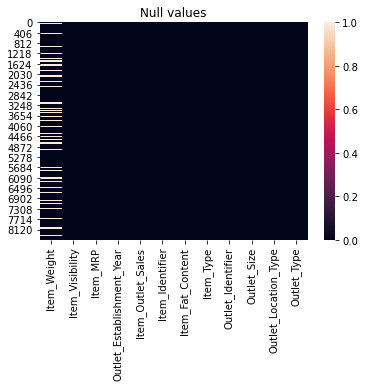

In [39]:
sns.heatmap(data.isnull())
plt.title("Null values")
plt.show()

In [40]:
mean_Item_Weight=np.mean(data['Item_Weight'])


In [41]:
data['Item_Weight']=data['Item_Weight'].fillna(mean_Item_Weight)


In [42]:
data.isnull().sum()

Item_Weight                  0
Item_Visibility              0
Item_MRP                     0
Outlet_Establishment_Year    0
Item_Outlet_Sales            0
Item_Identifier              0
Item_Fat_Content             0
Item_Type                    0
Outlet_Identifier            0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
dtype: int64

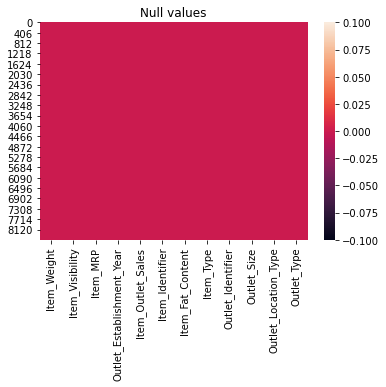

In [43]:
sns.heatmap(data.isnull())
plt.title("Null values")
plt.show()

In [44]:
data.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales,Item_Identifier,Item_Fat_Content,Item_Type,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type
count,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914,779.714889,1.369354,7.226681,4.722281,1.736360,1.112871,1.201220
std,4.226124,0.051598,62.275067,8.371760,1706.499616,449.222377,0.644810,4.209990,2.837201,0.989181,0.812757,0.796459
min,4.555000,0.000000,31.290000,1985.000000,33.290000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,9.310000,0.026989,93.826500,1987.000000,834.247400,395.500000,1.000000,4.000000,2.000000,1.000000,0.000000,1.000000
50%,12.857645,0.053931,143.012800,1999.000000,1794.331000,783.000000,1.000000,6.000000,5.000000,2.000000,1.000000,1.000000
75%,16.000000,0.094585,185.643700,2004.000000,3101.296400,1167.000000,2.000000,10.000000,7.000000,3.000000,2.000000,1.000000
max,21.350000,0.328391,266.888400,2009.000000,13086.964800,1558.000000,4.000000,15.000000,9.000000,3.000000,2.000000,3.000000


In [45]:
import warnings
warnings.filterwarnings('ignore')

In [46]:
data.columns

Index(['Item_Weight', 'Item_Visibility', 'Item_MRP',
       'Outlet_Establishment_Year', 'Item_Outlet_Sales', 'Item_Identifier',
       'Item_Fat_Content', 'Item_Type', 'Outlet_Identifier', 'Outlet_Size',
       'Outlet_Location_Type', 'Outlet_Type'],
      dtype='object')

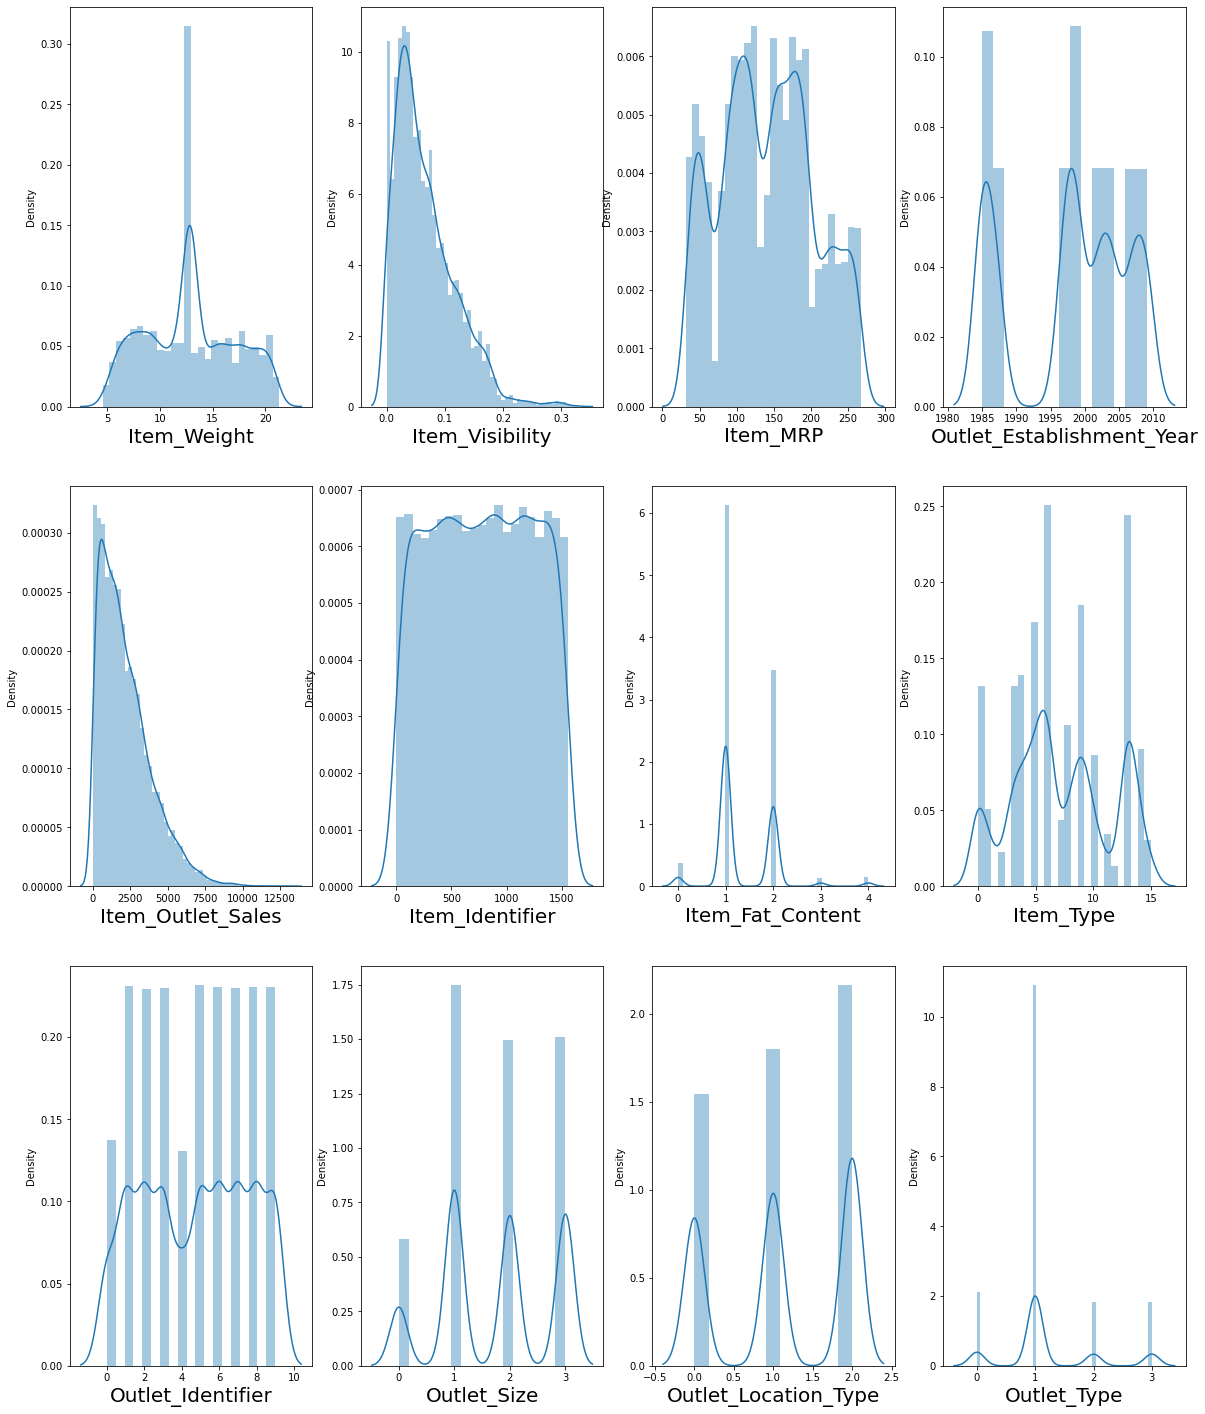

In [47]:
#now lets see how data is distributed in each column
plt.figure(figsize=(20,25),facecolor='white')
plotnumber=1
for column in data:
    if plotnumber<=12:
        ax=plt.subplot(3,4,plotnumber)
        sns.distplot(data[column])
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show()    

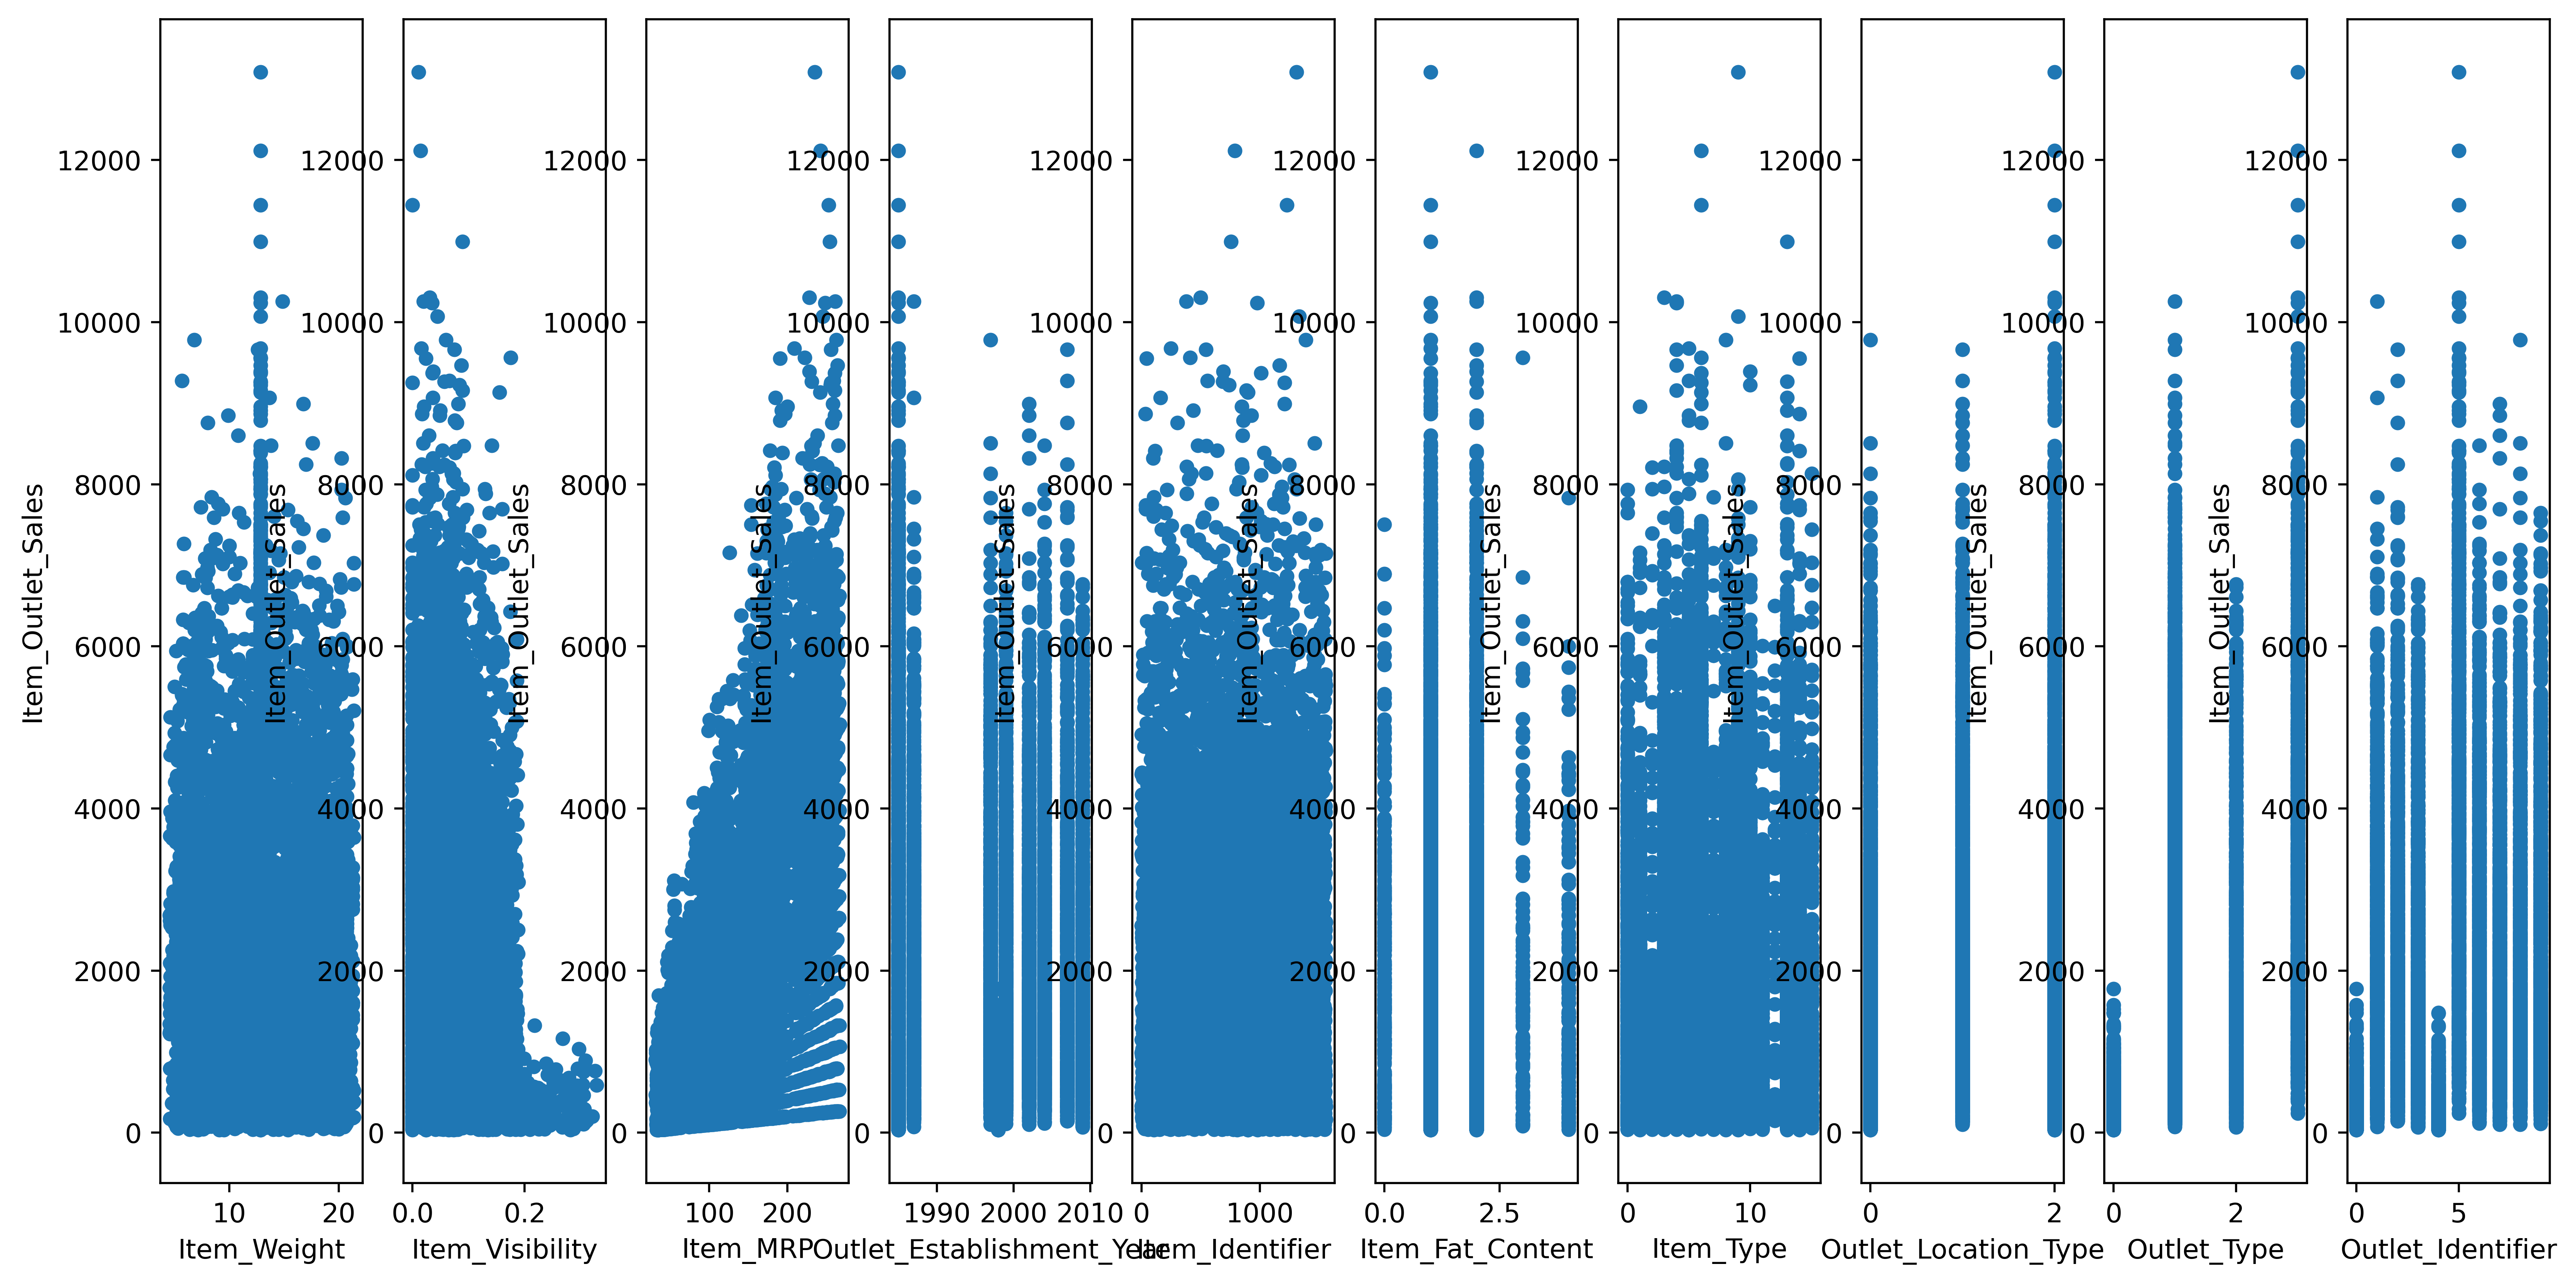

In [48]:
fig,axs=plt.subplots(1,10,figsize=(16,8),dpi=500)
data.plot(kind='scatter',x='Item_Weight',y='Item_Outlet_Sales',ax=axs[0],figsize=(16,8))
data.plot(kind='scatter',x='Item_Visibility',y='Item_Outlet_Sales',ax=axs[1],figsize=(16,8))
data.plot(kind='scatter',x='Item_MRP',y='Item_Outlet_Sales',ax=axs[2],figsize=(16,8))
data.plot(kind='scatter',x='Outlet_Establishment_Year',y='Item_Outlet_Sales',ax=axs[3],figsize=(16,8))
data.plot(kind='scatter',x='Item_Identifier',y='Item_Outlet_Sales',ax=axs[4],figsize=(16,8))
data.plot(kind='scatter',x='Item_Fat_Content',y='Item_Outlet_Sales',ax=axs[5],figsize=(16,8))
data.plot(kind='scatter',x='Item_Type',y='Item_Outlet_Sales',ax=axs[6],figsize=(16,8))
data.plot(kind='scatter',x='Outlet_Location_Type',y='Item_Outlet_Sales',ax=axs[7],figsize=(16,8))
data.plot(kind='scatter',x='Outlet_Type',y='Item_Outlet_Sales',ax=axs[8],figsize=(16,8))
data.plot(kind='scatter',x='Outlet_Identifier',y='Item_Outlet_Sales',ax=axs[9],figsize=(16,8))
fig.savefig('testdata22.jpg')

In [49]:
data.corr()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales,Item_Identifier,Item_Fat_Content,Item_Type,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type
Item_Weight,1.000000,-0.012049,0.024756,-0.008301,0.011550,0.044518,-0.017331,0.028015,-0.007975,-0.015096,0.004088,-0.000566
Item_Visibility,-0.012049,1.000000,-0.001315,-0.074834,-0.128625,-0.025482,0.034042,-0.035249,-0.100439,0.087796,-0.028099,-0.173468
Item_MRP,0.024756,-0.001315,1.000000,0.005020,0.567574,0.012853,-0.000876,0.032651,0.003319,-0.002473,0.000232,-0.001975
Outlet_Establishment_Year,-0.008301,-0.074834,0.005020,1.000000,-0.049135,-0.012772,-0.000189,0.004970,0.079035,0.470343,-0.089216,-0.122304
Item_Outlet_Sales,0.011550,-0.128625,0.567574,-0.049135,1.000000,0.002869,0.009800,0.017048,0.162325,-0.172477,0.089367,0.401522
Item_Identifier,0.044518,-0.025482,0.012853,-0.012772,0.002869,1.000000,-0.098114,-0.017973,-0.008602,0.000855,0.003656,-0.001178
Item_Fat_Content,-0.017331,0.034042,-0.000876,-0.000189,0.009800,-0.098114,1.000000,-0.115958,-0.002357,-0.004795,-0.004102,-0.004214
Item_Type,0.028015,-0.035249,0.032651,0.004970,0.017048,-0.017973,-0.115958,1.000000,0.001656,0.000827,0.003084,0.003053
Outlet_Identifier,-0.007975,-0.100439,0.003319,0.079035,0.162325,-0.008602,-0.002357,0.001656,1.000000,0.053224,-0.716176,0.099873
Outlet_Size,-0.015096,0.087796,-0.002473,0.470343,-0.172477,0.000855,-0.004795,0.000827,0.053224,1.000000,-0.290216,-0.432062


<AxesSubplot:>

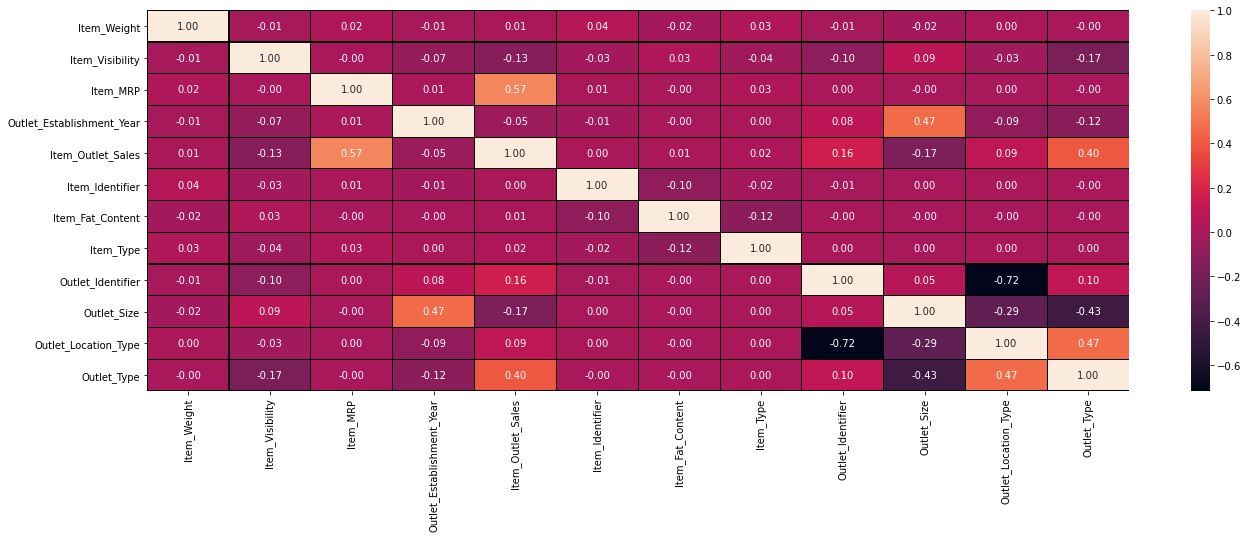

In [50]:
#heat map
plt.figure(figsize=(22,7))
sns.heatmap(data.corr(),annot=True,linewidths=0.1,linecolor='black',fmt='0.2f')

checking the columns whch are positive and negative correlated with the target column

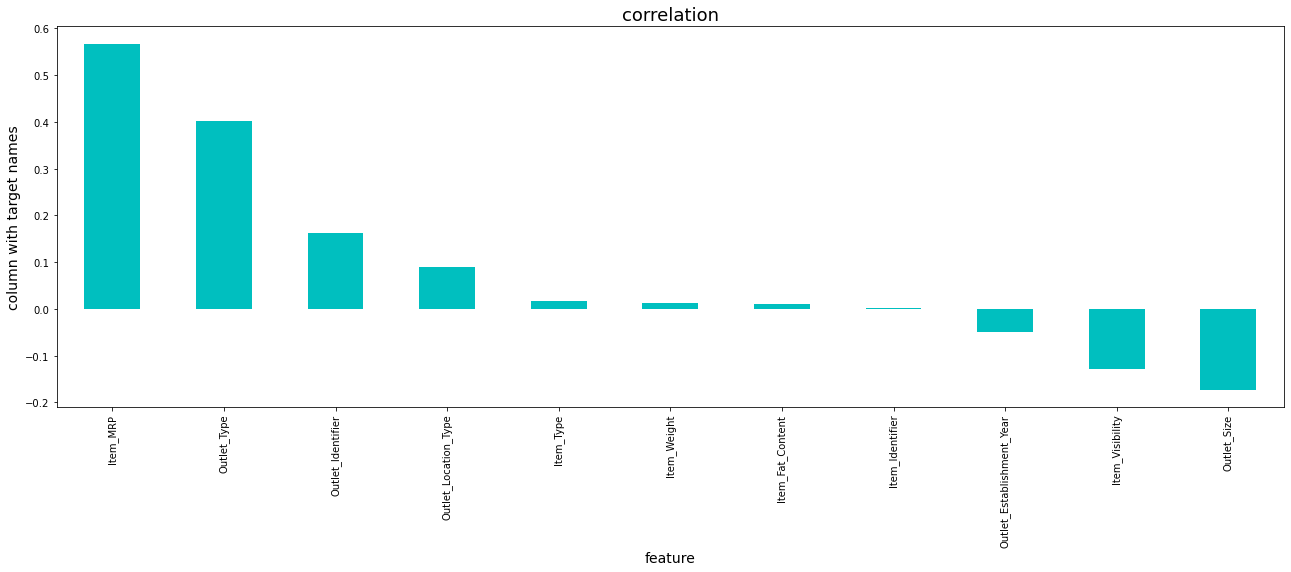

In [51]:
plt.figure(figsize=(22,7))
data.corr()['Item_Outlet_Sales'].sort_values(ascending=False).drop(['Item_Outlet_Sales']).plot(kind='bar',color='c')
plt.xlabel('feature',fontsize=14)
plt.ylabel('column with target names',fontsize=14)
plt.title('correlation',fontsize=18)
plt.show()

now lets check the skewness of data

In [52]:
data.skew()

Item_Weight                  0.090561
Item_Visibility              1.167091
Item_MRP                     0.127202
Outlet_Establishment_Year   -0.396641
Item_Outlet_Sales            1.177531
Item_Identifier             -0.008877
Item_Fat_Content             0.994824
Item_Type                    0.101655
Outlet_Identifier           -0.059861
Outlet_Size                 -0.131895
Outlet_Location_Type        -0.209093
Outlet_Type                  0.927438
dtype: float64

outlier check

In [53]:
df_features=data.drop('Item_Outlet_Sales',axis=1)

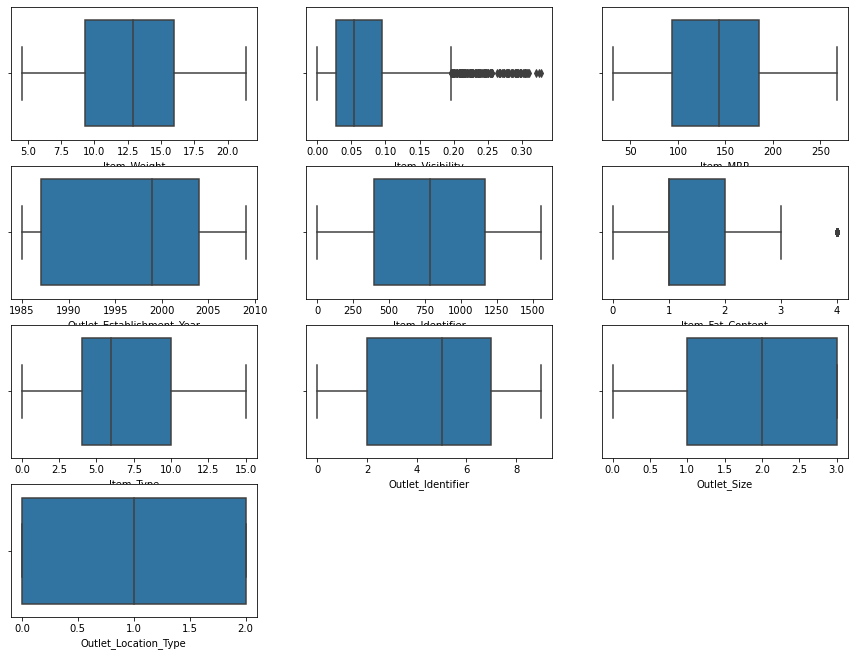

In [54]:
#visualize the outliers using boxplot
plt.figure(figsize=(15,20))
graph=1
for column in df_features:
    if graph<11:
        ax=plt.subplot(7,3,graph)
        sns.boxplot(df_features[column],orient='V')
        plt.xlabel(column,fontsize=10)
        graph+=1
plt.show()        

In [55]:
#find the IQR to identify outliers
#1st quantile
q1=data.quantile(0.25)
#3rd quantile
q3=data.quantile(0.75)
#IQR
iqr=q3-q1
print(iqr)

Item_Weight                     6.690000
Item_Visibility                 0.067596
Item_MRP                       91.817200
Outlet_Establishment_Year      17.000000
Item_Outlet_Sales            2267.049000
Item_Identifier               771.500000
Item_Fat_Content                1.000000
Item_Type                       6.000000
Outlet_Identifier               5.000000
Outlet_Size                     2.000000
Outlet_Location_Type            2.000000
Outlet_Type                     0.000000
dtype: float64


In [56]:
print(data < (q1 - 1.5 * iqr))

      Item_Weight  Item_Visibility  Item_MRP  Outlet_Establishment_Year  \
0           False            False     False                      False   
1           False            False     False                      False   
2           False            False     False                      False   
3           False            False     False                      False   
4           False            False     False                      False   
...           ...              ...       ...                        ...   
8518        False            False     False                      False   
8519        False            False     False                      False   
8520        False            False     False                      False   
8521        False            False     False                      False   
8522        False            False     False                      False   

      Item_Outlet_Sales  Item_Identifier  Item_Fat_Content  Item_Type  \
0                 False   

<AxesSubplot:>

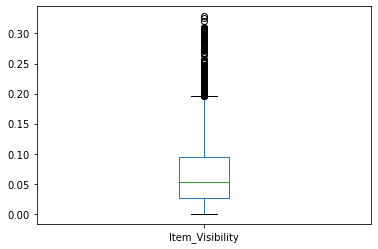

In [57]:
data['Item_Visibility'].plot.box()

In [58]:
#validating outliers
visiblity_high=(q3.Item_Visibility+(1.5*iqr.Item_Visibility))
visiblity_high

0.195979015

In [59]:
index=np.where(data['Item_Visibility']>visiblity_high)
index

(array([  49,   83,  108,  174,  334,  434,  502,  521,  532,  680,  847,
         854,  966, 1159, 1225, 1272, 1291, 1311, 1324, 1434, 1496, 1501,
        1560, 1575, 1644, 1651, 1754, 1805, 1827, 1841, 1941, 2081, 2088,
        2122, 2177, 2251, 2324, 2336, 2401, 2403, 2439, 2445, 2586, 2613,
        2728, 2855, 2895, 3001, 3017, 3171, 3206, 3336, 3341, 3399, 3458,
        3474, 3488, 3497, 3540, 3750, 3767, 3811, 3884, 3993, 4006, 4175,
        4192, 4219, 4350, 4382, 4408, 4530, 4538, 4567, 4656, 4674, 4789,
        4941, 4987, 5031, 5050, 5057, 5083, 5150, 5154, 5287, 5354, 5366,
        5374, 5445, 5634, 5732, 5734, 5784, 5795, 5837, 5880, 5891, 5946,
        6008, 6012, 6102, 6179, 6536, 6547, 6576, 6622, 6647, 6670, 6674,
        6786, 6833, 6903, 6909, 6926, 6953, 6966, 7005, 7030, 7072, 7081,
        7088, 7107, 7121, 7215, 7250, 7278, 7368, 7388, 7499, 7558, 7603,
        7639, 7744, 7866, 7949, 8194, 8215, 8273, 8292, 8345, 8371, 8432,
        8509], dtype=int64),)

this are the indexes in which data of item_visiblity i.e outlier is beyond the 0.1959 so lets we will drop this indexes in next step

In [60]:
data=data.drop(data.index[index])
data.shape

(8379, 12)

so 144 data indexes row were dropped,lets will reset the index sequence 

In [61]:
data.reset_index()

,index,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales,Item_Identifier,Item_Fat_Content,Item_Type,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,0,9.300,0.016047,249.8092,1999,3735.1380,156,1,4,9,1,0,1
1,1,5.920,0.019278,48.2692,2009,443.4228,8,2,14,3,1,2,2
2,2,17.500,0.016760,141.6180,1999,2097.2700,662,1,10,9,1,0,1
3,3,19.200,0.000000,182.0950,1998,732.3800,1121,2,6,0,3,2,0
4,4,8.930,0.000000,53.8614,1987,994.7052,1297,1,9,1,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8374,8518,6.865,0.056783,214.5218,1987,2778.3834,370,1,13,1,0,2,1
8375,8519,8.380,0.046982,108.1570,2002,549.2850,897,2,0,7,3,1,1
8376,8520,10.600,0.035186,85.1224,2004,1193.1136,1357,1,8,6,2,1,1
8377,8521,7.210,0.145221,103.1332,2009,1845.5976,681,2,13,3,1,2,2


<AxesSubplot:>

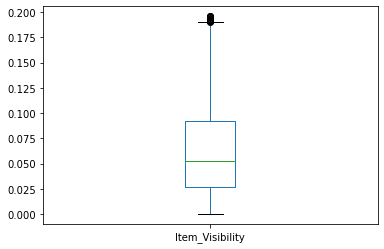

In [62]:
data['Item_Visibility'].plot.box()

In [63]:
#devide data set into feature and label
y=data['Item_Outlet_Sales']
x=data.drop(['Item_Outlet_Sales'],axis=1)

In [64]:
y

0       3735.1380
1        443.4228
2       2097.2700
3        732.3800
4        994.7052
          ...    
8518    2778.3834
8519     549.2850
8520    1193.1136
8521    1845.5976
8522     765.6700
Name: Item_Outlet_Sales, Length: 8379, dtype: float64

In [65]:
x

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Identifier,Item_Fat_Content,Item_Type,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,9.300,0.016047,249.8092,1999,156,1,4,9,1,0,1
1,5.920,0.019278,48.2692,2009,8,2,14,3,1,2,2
2,17.500,0.016760,141.6180,1999,662,1,10,9,1,0,1
3,19.200,0.000000,182.0950,1998,1121,2,6,0,3,2,0
4,8.930,0.000000,53.8614,1987,1297,1,9,1,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...
8518,6.865,0.056783,214.5218,1987,370,1,13,1,0,2,1
8519,8.380,0.046982,108.1570,2002,897,2,0,7,3,1,1
8520,10.600,0.035186,85.1224,2004,1357,1,8,6,2,1,1
8521,7.210,0.145221,103.1332,2009,681,2,13,3,1,2,2


In [66]:
data.shape

(8379, 12)

In [67]:
from sklearn.preprocessing import StandardScaler

In [68]:
scalar=StandardScaler()
x_scaled=scalar.fit_transform(x)
x_scaled

array([[-0.84040636, -1.01923463,  1.7479249 , ..., -0.73058048,
        -1.37981989, -0.28177934],
       [-1.63724716, -0.94919036, -1.48870156, ..., -0.73058048,
         1.09296609,  0.98827395],
       [ 1.0927577 , -1.00378212,  0.0104311 , ..., -0.73058048,
        -1.37981989, -0.28177934],
       ...,
       [-0.53392913, -0.6043134 , -0.89685854, ...,  0.27874085,
        -0.1434269 , -0.28177934],
       [-1.33312745,  1.78116489, -0.60761456, ..., -0.73058048,
         1.09296609,  0.98827395],
       [ 0.45622807, -0.39419655, -1.05191919, ...,  0.27874085,
        -1.37981989, -0.28177934]])

# model building

In [69]:
x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,test_size=0.25,random_state=323)

In [70]:
y_train.head()

7207    1274.3412
3999    6331.7580
5499     758.3462
8473     431.4384
5543    1065.2800
Name: Item_Outlet_Sales, dtype: float64

In [71]:
#model instantiating and training
regression=LinearRegression()
regression.fit(x_train,y_train)

LinearRegression()

In [72]:
#predict the happiness score of given feature
data.tail(2)

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales,Item_Identifier,Item_Fat_Content,Item_Type,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type
8521,7.21,0.145221,103.1332,2009,1845.5976,681,2,13,3,1,2,2
8522,14.80,0.044878,75.4670,1997,765.6700,50,1,14,8,2,0,1


In [73]:
print(' Item_Outlet_Sales is:',regression.predict(scalar.transform([[7.21,0.145221,103.1332,2009,681,2,13,3,1,2,2]])))

 Item_Outlet_Sales is: [1976.11353942]


# saving model for further prediction¶

In [74]:
#saving model to the local file system
filename='finalized_model_mart_sales.pickle'
pickle.dump(regression,open(filename,'wb'))
#prediction using the saved model
Loaded_model=pickle.load(open(filename,'rb'))
a=Loaded_model.predict(scalar.transform([[14.8,0.044878,75.4670,1997,50,1,14,8,2,0,1]]))
a

array([1274.03168886])

In [75]:
#Adjusted R2 score
regression.score(x_train,y_train)

0.499542644255927

In [76]:
#check how well model fits the test data
regression.score(x_test,y_test)

0.49250337977987513

In [77]:
#lets plot and visualize
y_pred=regression.predict(x_test)
y_pred

array([1271.51637936,  989.01737036,  655.48023504, ..., 3947.07141022,
       2947.7458984 , 1932.82271251])

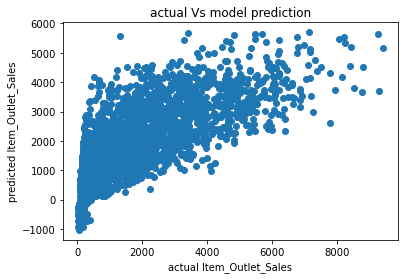

In [78]:
plt.scatter(y_test,y_pred)
plt.xlabel('actual Item_Outlet_Sales')
plt.ylabel('predicted Item_Outlet_Sales')
plt.title('actual Vs model prediction')
plt.show()

# cross validation of model

regularization

In [79]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
import warnings
from sklearn.linear_model import Lasso
warnings.filterwarnings('ignore')


In [80]:
parameters={'alpha':[.0001,0.001,.01,.1,1,10],'random_state':list(range(0,10))}
ls=Lasso()
clf=GridSearchCV(ls,parameters)
clf.fit(x_train,y_train)
print(clf.best_params_)

{'alpha': 10, 'random_state': 0}


In [81]:
from sklearn.metrics import r2_score

In [82]:
ls=Lasso(alpha=10,random_state=0)
ls.fit(x_train,y_train)
ls.score(x_train,y_train)
pred_ls=ls.predict(x_test)
lss=r2_score(y_test,pred_ls)
lss

0.4925242214133043

In [83]:
cv_score=cross_val_score(ls,x,y,cv=5)
cv_mean=cv_score.mean()
cv_mean

0.49487501704244796

# Ensemble technique

In [84]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

In [85]:
parameters={'criterion':['mse','mae'],'max_features':['auto','sqrt','log2']}
rf=RandomForestRegressor()
clf=GridSearchCV(rf,parameters)
clf.fit(x_train,y_train)
print(clf.best_params_)

{'criterion': 'mae', 'max_features': 'log2'}


In [86]:
rf=RandomForestRegressor(criterion='mse',max_features='auto')
rf.fit(x_train,y_train)
rf.score(x_train,y_train)
pred_decision=rf.predict(x_test)
rfs=r2_score(y_test,pred_decision)
print('R2score:',rfs*100)
rfscore=cross_val_score(rf,x,y,cv=5)
rfc=rfscore.mean()
print('cross val score:',rfc*100)                         

R2score: 55.69229942830185
cross val score: 54.09395435870088
